<a href="https://colab.research.google.com/github/abhi1994-tim/NLP_Projects/blob/main/n_Grams_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Let’s understand n-grams practically with the help of the following sample sentence:

# “I reside in Bengaluru”.

In [4]:
import nltk
from nltk import ngrams
sentence = 'I reside in Bengaluru.'
n = 1 #change accoridng to n-grams(1,2,3,4)

unigrams = ngrams(sentence.split(), n)
for grams in unigrams:
    print(grams)

('I',)
('reside',)
('in',)
('Bengaluru.',)


In [5]:
import nltk
from nltk import ngrams
sentence = 'I reside in Bengaluru.'
n = 2 #change accoridng to n-grams(1,2,3,4)

unigrams = ngrams(sentence.split(), n)
for grams in unigrams:
    print(grams)

('I', 'reside')
('reside', 'in')
('in', 'Bengaluru.')


In [6]:
import nltk
from nltk import ngrams
sentence = 'I reside in Bengaluru.'
n = 3 #change accoridng to n-grams(1,2,3,4)

unigrams = ngrams(sentence.split(), n)
for grams in unigrams:
    print(grams)

('I', 'reside', 'in')
('reside', 'in', 'Bengaluru.')


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use(style='sns')

df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1")
print(df.head())

  Sentiment                                      News Headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [9]:
df.isna().sum()

,0
Sentiment,0
News Headline,0


In [10]:
# The data is just perfect, with absolutely no missing values at all! That’s our luck, indeed!

In [11]:
df['Sentiment'].value_counts()

,count
Sentiment,
neutral,2879
positive,1363
negative,604


In [12]:
# Step 2: Feature Extraction
# Our objective is to predict the sentiment of a given news headline. Obviously, the ‘News Headline’ column is our only feature,
# and the ‘Sentiment’ column is our target variable.

In [13]:
y=df['Sentiment'].values
y.shape

(4846,)

In [14]:
x=df['News Headline'].values

In [15]:
x.shape

(4846,)

In [16]:
# Step 3: Train-Test Split
# In any machine learning, deep learning, or NLP(Natural Language Processing) task, splitting the data into train and test is indeed a
# highly crucial step. The train_test_split() method provided by sklearn is widely used for the same. So, let’s begin by importing it:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2907,)
(2907,)
(1939,)
(1939,)


In [19]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})
df1

,news
0,Finnish operator Elisa and Aker Yards have sig...
1,The customer is local company Etera Mutual Pen...
2,Karppinen expects the consolidation trend to c...
3,The contract also includes cutting and edging ...
4,Net sales fell by 33 % from the third quarter ...
...,...
2902,It also has potential clients in the growing e...
2903,The subsidiary will be responsible for filter ...
2904,"Yesterday , Legrand issued its E300 million fi..."
2905,"Nevertheless , Fitch notes that the business f..."


In [20]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)
df2

,sentiment
0,positive
1,neutral
2,neutral
3,neutral
4,negative
...,...
2902,neutral
2903,neutral
2904,neutral
2905,positive


In [21]:
df_train.head()

,news,sentiment
0,Finnish operator Elisa and Aker Yards have sig...,positive
1,The customer is local company Etera Mutual Pen...,neutral
2,Karppinen expects the consolidation trend to c...,neutral
3,The contract also includes cutting and edging ...,neutral
4,Net sales fell by 33 % from the third quarter ...,negative


In [22]:
df_train.shape

(2907, 2)

In [23]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})
df3.shape

(1939, 1)

In [24]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [25]:
df_test.head()

,news,sentiment
0,It is estimated that the consolidated turnover...,positive
1,The desk will reach its full planned strength ...,neutral
2,26 January 2011 - Finnish software solutions p...,neutral
3,The reductions will be implemented mainly in t...,neutral
4,The company said that its investments in the n...,negative


In [26]:
df_test.shape

(2907, 2)

In [27]:
# Step 4: Basic Pre-Processing of Train and Test Data
# Here, in order to pre-process our text data, we will remove punctuations in train and test data for the ‘news’ column using punctuation
# provided by the string library.

In [28]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""
  for i in text:
    if i not in string.punctuation:
      ans+=i
  return ans

In [30]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [31]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,Finnish operator Elisa and Aker Yards have sig...,positive
1,The customer is local company Etera Mutual Pen...,neutral
2,Karppinen expects the consolidation trend to c...,neutral
3,The contract also includes cutting and edging ...,neutral
4,Net sales fell by 33 from the third quarter o...,negative


In [32]:
# Compare the above output with the previous output of df_train. You can observe that punctuations have been successfully removed from the text
# present in the feature column(news column) of the training dataset. Similarly, from the above codes, punctuations will be removed successfully
# from the news column of the test data frame as well. You can optionally view df_test.head() as well to note it.

In [33]:
# As a next step, we have to remove stopwords from the news column. For this, let’s use the stopwords provided by nltk as follows:

In [34]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

In [36]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

The above function inputs two parameters, namely, text and ngram, which refer to the text data for which we want to generate a given number of n-grams and the number of grams to be generated, respectively. Firstly, word tokenization is done where the stop words are ignored, and the remaining words are retained. From the example section, you must have been clear on how to generate n-grams manually for a given text. We have coded the very same logic in the function generate_N_grams() above. It will thus consider n words at a time from the text where n is given by the value of the ngram parameter of the function.

In [38]:
#sample!
generate_N_grams("The sun rises in the east",2)
#this is generated for the Bi grams

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

Step 6: Creating Unigrams
Let’s follow the steps below to create unigrams for the news column of the df_train data frame:

Create unigrams for each of the news records belonging to each of the three categories of sentiments.
Store the word and its count in the corresponding dictionaries.
Convert these dictionaries to corresponding data frames.
Fetch the top 10 most frequently used words.
Visualize the most frequently used words for all the 3 categories-positive, negative and neutral.

In [39]:
from collections import defaultdict

In [40]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [41]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['Finnish', 'operator', 'Elisa', 'Aker', 'Yards', 'signed', 'longterm', 'service', 'deal', 'Elisa', 'deliver', 'necessary', 'voice', 'data', 'services', 'Aker', 'Yards', 'Finland', '']
Sentence after removing stopwords: ['The', 'sale', '', 'result', 'gain', 'EUR', '60', 'million', 'second', 'quarter', '2010', 'OriolaKD', '', 'supports', 'Finnish', 'company', 'strategy', 'focus', 'pharmaceutical', 'wholesale', 'retail', 'operations', '']
Sentence after removing stopwords: ['Sales', 'increased', 'due', 'growing', 'market', 'rates', 'increased', 'operations', '']
Sentence after removing stopwords: ['The', 'terms', 'financing', 'approved', 'Annual', 'General', 'Meeting', 'Company', 'held', 'June', '30', '', '2010', '']
Sentence after removing stopwords: ['The', 'company', 'also', 'said', 'Poland', 'profitability', 'program', 'launched', 'Oborniki', 'steel', 'frame', 'sandwich', 'panel', 'plant', '']
Sentence after removing stopwords: ['The', 'company', 'a

In [42]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['Net', 'sales', 'fell', '33', '', 'third', 'quarter', '2008', 'EUR', '1305', 'mn', '']
Sentence after removing stopwords: ['Finnish', 'Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', 'electronics', 'industry', '', 'reports', 'net', 'sales', 'EUR', '496', 'mn', 'first', 'quarter', '2009', '', 'per', 'cent', 'smaller', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Finnish', 'industrial', 'group', 'Ruukki', 'Group', 'brought', 'counter', 'action', 'Finnish', 'metal', 'company', 'Rautaruukki', 'dispute', 'concerning', 'names', 'companies', '']
Sentence after removing stopwords: ['The', 'Finnish', 'company', 'previously', 'said', 'operating', 'result', 'lower', 'breakeven', 'posted', 'year', 'earlier', '']
Sentence after removing stopwords: ['Finnish', 'Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', 'electronics', 'industry', '', 'repor

In [43]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['The', 'customer', 'local', 'company', 'Etera', 'Mutual', 'Pension', 'Insurance', 'Co', 'principal', 'tenant', 'unit', 'media', 'company', 'Alma', 'Media', 'Corp', 'HEL', '', 'ALN1V', '']
Sentence after removing stopwords: ['Karppinen', 'expects', 'consolidation', 'trend', 'continue', 'Finnish', 'market', '']
Sentence after removing stopwords: ['The', 'contract', 'also', 'includes', 'cutting', 'edging', 'wagon', 'parts', 'Ruukki', 'steel', 'service', 'centres', 'Seinajoki', 'Raahe', '', 'southwestern', 'Finland', '', 'delivered', 'VR', 'welding', 'assembly', '']
Sentence after removing stopwords: ['Oka', 'specialises', 'new', 'construction', '', 'renovation', 'work', 'residential', 'nonresidential', 'building', 'well', 'premises', 'industrial', 'logistical', 'use', '']
Sentence after removing stopwords: ['The', 'sales', 'price', 'disclosed', '']
Sentence after removing stopwords: ['Pohjola', 'act', 'manager', 'issue', 'bond', 'listed', 'NASDAQ', 'OMX

In [44]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [46]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [47]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [48]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

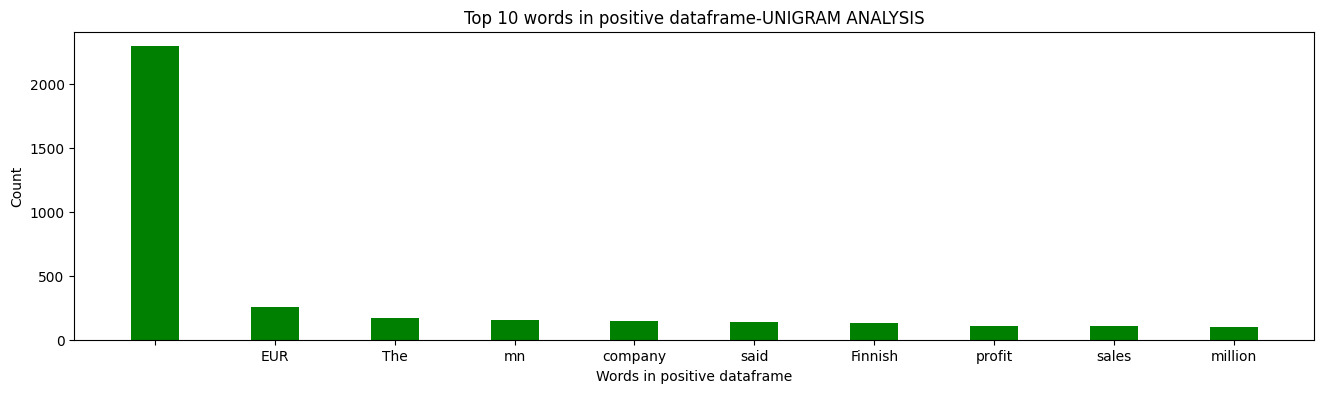

In [49]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

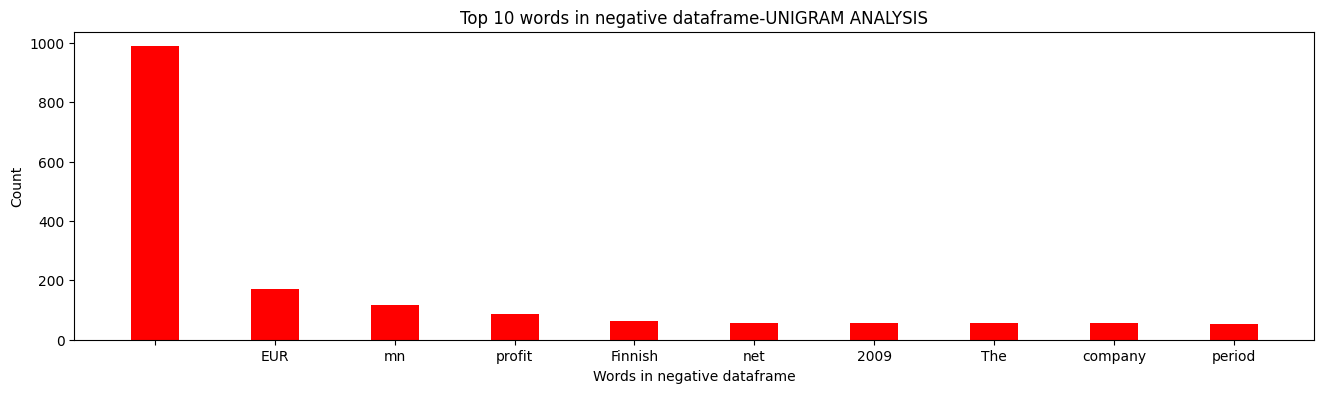

In [50]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

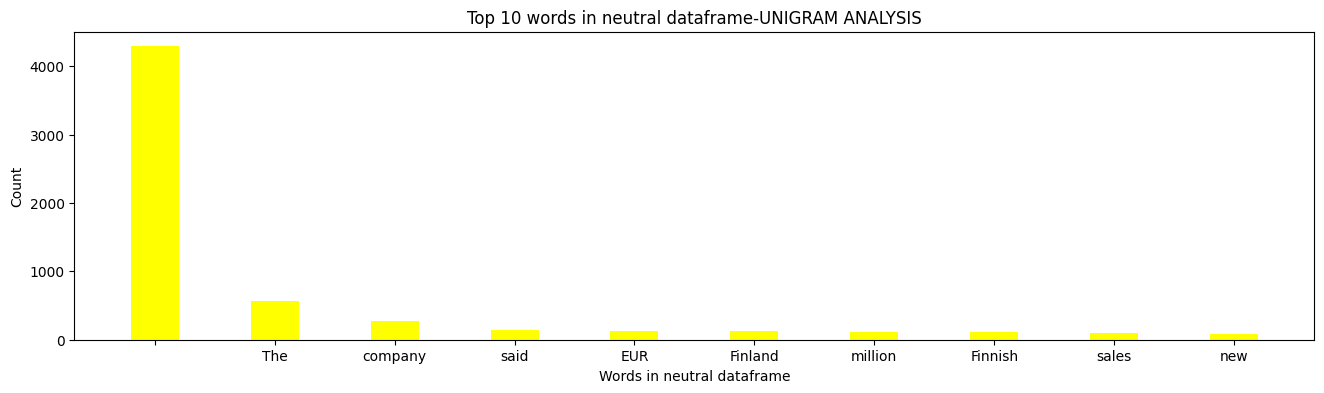

In [51]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

Step 7: Creating Bigrams
Repeat the same steps which we followed to analyze our data using unigrams, except that you have to pass parameter 2 while invoking the generate_N_grams() function. You can optionally consider changing the names of the data frames, which I have done.

In [52]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [53]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['Finnish', 'operator', 'Elisa', 'Aker', 'Yards', 'signed', 'longterm', 'service', 'deal', 'Elisa', 'deliver', 'necessary', 'voice', 'data', 'services', 'Aker', 'Yards', 'Finland', '']
Sentence after removing stopwords: ['The', 'sale', '', 'result', 'gain', 'EUR', '60', 'million', 'second', 'quarter', '2010', 'OriolaKD', '', 'supports', 'Finnish', 'company', 'strategy', 'focus', 'pharmaceutical', 'wholesale', 'retail', 'operations', '']
Sentence after removing stopwords: ['Sales', 'increased', 'due', 'growing', 'market', 'rates', 'increased', 'operations', '']
Sentence after removing stopwords: ['The', 'terms', 'financing', 'approved', 'Annual', 'General', 'Meeting', 'Company', 'held', 'June', '30', '', '2010', '']
Sentence after removing stopwords: ['The', 'company', 'also', 'said', 'Poland', 'profitability', 'program', 'launched', 'Oborniki', 'steel', 'frame', 'sandwich', 'panel', 'plant', '']
Sentence after removing stopwords: ['The', 'company', 'a

In [54]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['Net', 'sales', 'fell', '33', '', 'third', 'quarter', '2008', 'EUR', '1305', 'mn', '']
Sentence after removing stopwords: ['Finnish', 'Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', 'electronics', 'industry', '', 'reports', 'net', 'sales', 'EUR', '496', 'mn', 'first', 'quarter', '2009', '', 'per', 'cent', 'smaller', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Finnish', 'industrial', 'group', 'Ruukki', 'Group', 'brought', 'counter', 'action', 'Finnish', 'metal', 'company', 'Rautaruukki', 'dispute', 'concerning', 'names', 'companies', '']
Sentence after removing stopwords: ['The', 'Finnish', 'company', 'previously', 'said', 'operating', 'result', 'lower', 'breakeven', 'posted', 'year', 'earlier', '']
Sentence after removing stopwords: ['Finnish', 'Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', 'electronics', 'industry', '', 'repor

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['The', 'customer', 'local', 'company', 'Etera', 'Mutual', 'Pension', 'Insurance', 'Co', 'principal', 'tenant', 'unit', 'media', 'company', 'Alma', 'Media', 'Corp', 'HEL', '', 'ALN1V', '']
Sentence after removing stopwords: ['Karppinen', 'expects', 'consolidation', 'trend', 'continue', 'Finnish', 'market', '']
Sentence after removing stopwords: ['The', 'contract', 'also', 'includes', 'cutting', 'edging', 'wagon', 'parts', 'Ruukki', 'steel', 'service', 'centres', 'Seinajoki', 'Raahe', '', 'southwestern', 'Finland', '', 'delivered', 'VR', 'welding', 'assembly', '']
Sentence after removing stopwords: ['Oka', 'specialises', 'new', 'construction', '', 'renovation', 'work', 'residential', 'nonresidential', 'building', 'well', 'premises', 'industrial', 'logistical', 'use', '']
Sentence after removing stopwords: ['The', 'sales', 'price', 'disclosed', '']
Sentence after removing stopwords: ['Pohjola', 'act', 'manager', 'issue', 'bond', 'listed', 'NASDAQ', 'OMX

In [56]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

In [57]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [58]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [59]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [60]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

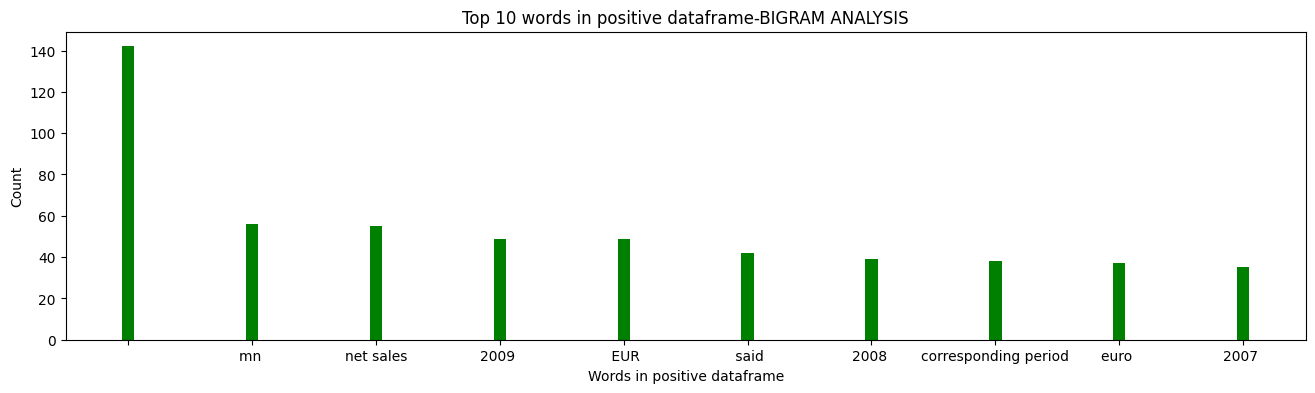

In [66]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.1)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.show()

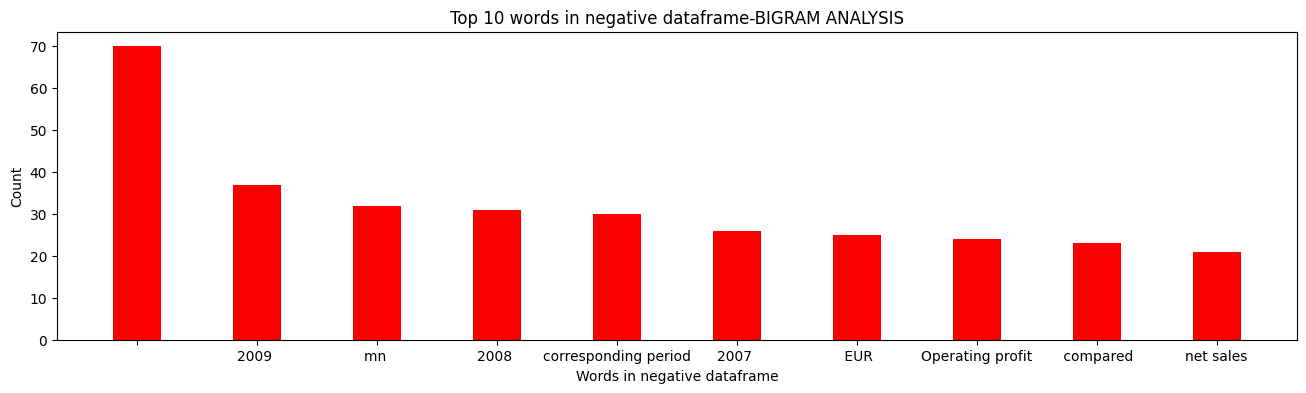

In [67]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

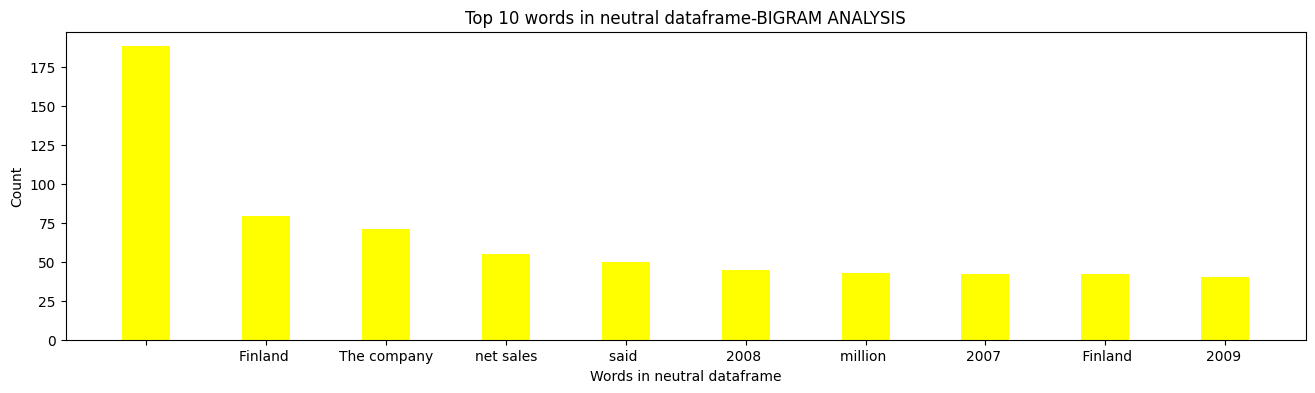

In [68]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

Step 8: Creating Trigrams
Repeat the same steps which we followed to analyze our data using unigrams, except that you have to pass parameter 3 while invoking the generate_N_grams() function. You can optionally consider changing the names of the data frames, which I have done.

In [69]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [70]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['Finnish', 'operator', 'Elisa', 'Aker', 'Yards', 'signed', 'longterm', 'service', 'deal', 'Elisa', 'deliver', 'necessary', 'voice', 'data', 'services', 'Aker', 'Yards', 'Finland', '']
Sentence after removing stopwords: ['The', 'sale', '', 'result', 'gain', 'EUR', '60', 'million', 'second', 'quarter', '2010', 'OriolaKD', '', 'supports', 'Finnish', 'company', 'strategy', 'focus', 'pharmaceutical', 'wholesale', 'retail', 'operations', '']
Sentence after removing stopwords: ['Sales', 'increased', 'due', 'growing', 'market', 'rates', 'increased', 'operations', '']
Sentence after removing stopwords: ['The', 'terms', 'financing', 'approved', 'Annual', 'General', 'Meeting', 'Company', 'held', 'June', '30', '', '2010', '']
Sentence after removing stopwords: ['The', 'company', 'also', 'said', 'Poland', 'profitability', 'program', 'launched', 'Oborniki', 'steel', 'frame', 'sandwich', 'panel', 'plant', '']
Sentence after removing stopwords: ['The', 'company', 'a

In [71]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['Net', 'sales', 'fell', '33', '', 'third', 'quarter', '2008', 'EUR', '1305', 'mn', '']
Sentence after removing stopwords: ['Finnish', 'Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', 'electronics', 'industry', '', 'reports', 'net', 'sales', 'EUR', '496', 'mn', 'first', 'quarter', '2009', '', 'per', 'cent', 'smaller', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Finnish', 'industrial', 'group', 'Ruukki', 'Group', 'brought', 'counter', 'action', 'Finnish', 'metal', 'company', 'Rautaruukki', 'dispute', 'concerning', 'names', 'companies', '']
Sentence after removing stopwords: ['The', 'Finnish', 'company', 'previously', 'said', 'operating', 'result', 'lower', 'breakeven', 'posted', 'year', 'earlier', '']
Sentence after removing stopwords: ['Finnish', 'Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', 'electronics', 'industry', '', 'repor

In [72]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['The', 'customer', 'local', 'company', 'Etera', 'Mutual', 'Pension', 'Insurance', 'Co', 'principal', 'tenant', 'unit', 'media', 'company', 'Alma', 'Media', 'Corp', 'HEL', '', 'ALN1V', '']
Sentence after removing stopwords: ['Karppinen', 'expects', 'consolidation', 'trend', 'continue', 'Finnish', 'market', '']
Sentence after removing stopwords: ['The', 'contract', 'also', 'includes', 'cutting', 'edging', 'wagon', 'parts', 'Ruukki', 'steel', 'service', 'centres', 'Seinajoki', 'Raahe', '', 'southwestern', 'Finland', '', 'delivered', 'VR', 'welding', 'assembly', '']
Sentence after removing stopwords: ['Oka', 'specialises', 'new', 'construction', '', 'renovation', 'work', 'residential', 'nonresidential', 'building', 'well', 'premises', 'industrial', 'logistical', 'use', '']
Sentence after removing stopwords: ['The', 'sales', 'price', 'disclosed', '']
Sentence after removing stopwords: ['Pohjola', 'act', 'manager', 'issue', 'bond', 'listed', 'NASDAQ', 'OMX

In [73]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [74]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [75]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [76]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

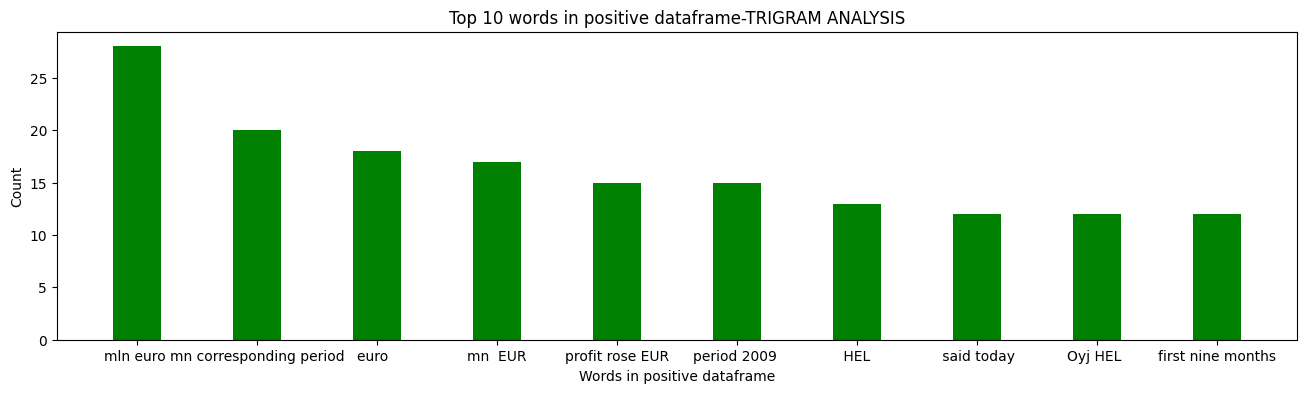

In [77]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.show()

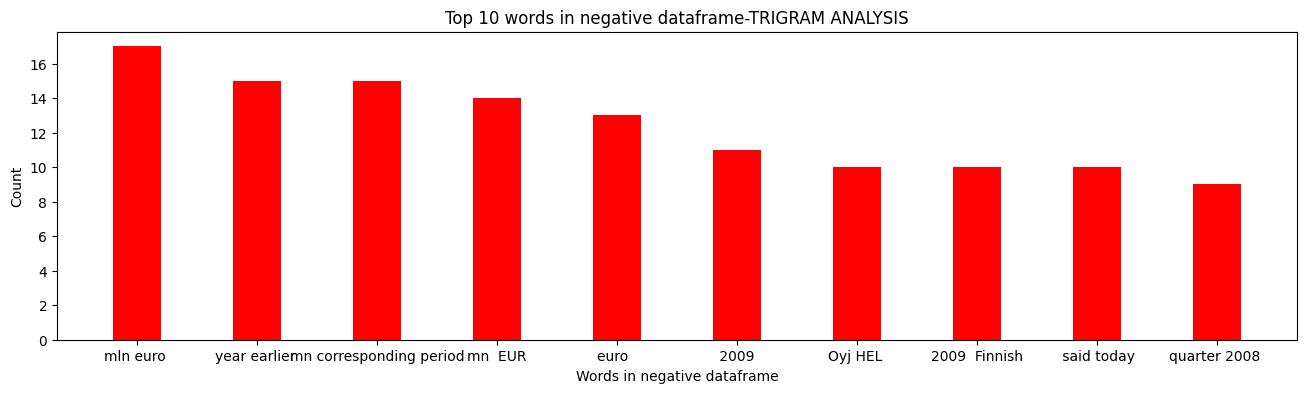

In [78]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

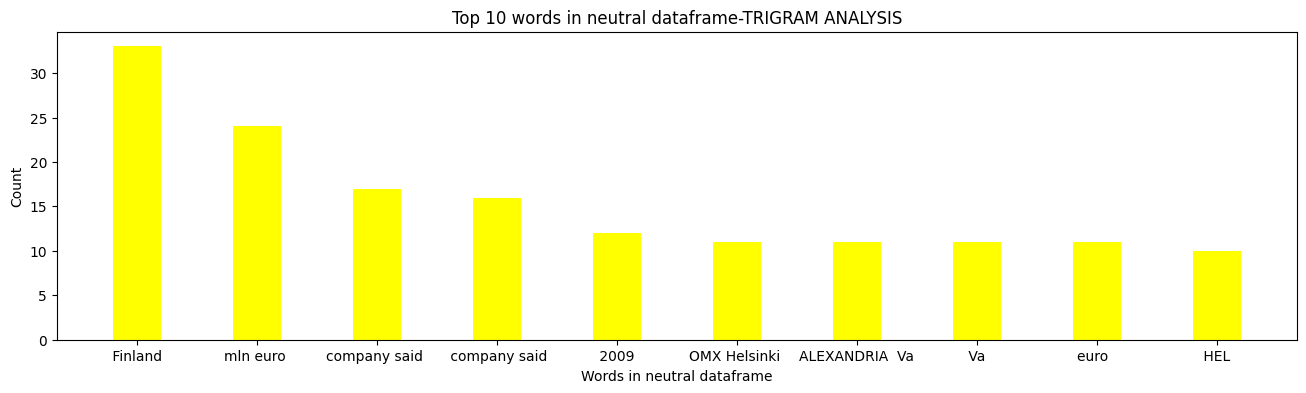

In [79]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

Advantages of Using N-grams

**Understanding Context:** These help capture the meaning of words based on the words around them. This means they can better predict what comes next in a sentence.

**Easy to Use**: These models are simple to create and understand. They work by counting how often different word sequences appear in a text, making it clear how predictions are made.

**Adjustable Size:** You can change the size of ‘n’ to fit your needs. A smaller ‘n’ is faster but may miss some context, while a larger ‘n’ captures more information but is more complex.

**Wide Range of Uses:** N-grams can be used in many applications, like speech recognition, translating languages, and suggesting the next word when you type.

**Statistical Approach**: N-gram models use statistics to predict the likelihood of word sequences. This helps in tasks like filtering spam emails or improving text suggestions.

Results of the Model

From the above graphs, we can conclude that trigrams perform the best on our train data. This is because it provides more useful words frequently, such as profit rose EUR, a year earlier for the positive data frame, corresponding period, period 2007, names of companies such as HEL for the negative data frame and Finland, the company said and again names of companies such as HEL, OMX Helsinki and so on for the neutral data frame.